In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cosine
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import string
from sklearn.metrics import mean_squared_error
import csv

from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()

# Libraries for text preprocessing
import re
import nltk

#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

#Word cloud
from os import path
from PIL import Image

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

import pandas
import seaborn as sns

#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix

from PIL import Image
import requests
from io import BytesIO


In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amanj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amanj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
forbes = pd.read_csv("Forbes.csv")

In [4]:
imdb = pd.read_csv("imdb_full.csv")

In [5]:
forbes.head()

,Name_name,Name_Bio,Name_Image,Name_Rank
0,Virat Kohli,The cricket star occupies top spot on the 2019...,https://www.forbesindia.com/media/celeblist201...,1
1,Akshay Kumar,The actor beat global A-listers like Rihanna a...,https://www.forbesindia.com/media/celeblist201...,2
2,Salman Khan,Salman Khan slipped from the top position on t...,https://www.forbesindia.com/media/celeblist201...,3
3,Amitabh Bachchan,Amitabh Bachchan has moved further up the rank...,https://www.forbesindia.com/media/celeblist201...,4
4,MS Dhoni,MS Dhoni is steady at No 5 because of his bran...,https://www.forbesindia.com/media/celeblist201...,5


In [6]:
imdb.head()

,web-scraper-order,web-scraper-start-url,link1,link1-href,link2,link2-href,imgurl-src,born,nickname,height,bio,name,birth name
0,1588008158-4124,https://www.imdb.com/list/ls002913270/,Aamir Khan,https://www.imdb.com/name/nm0451148?ref_=nmls_hd,See full bio,https://www.imdb.com/name/nm0451148/bio?ref_=n...,https://m.media-amazon.com/images/M/MV5BMjAwMj...,"March 14, \n \n1965 \n \nin Bombay, Ma...",Mr. Perfectionist\nTom Hanks of India\nAce of ...,"5' 4"" (1.62 m)",Aamir is no doubt one of the most dedicated ac...,Aamir Khan,NaN
1,1588007983-4102,https://www.imdb.com/list/ls002913270/,Madhuri Dixit,https://www.imdb.com/name/nm0002043?ref_=nmls_hd,See full bio,https://www.imdb.com/name/nm0002043/bio?ref_=n...,https://m.media-amazon.com/images/M/MV5BNTk0OT...,"May 15, \n \n1967 \n \nin Bombay, Maha...",Bubbly\nDhak Dhak Girl\nMohini,"5' 2½"" (1.58 m)",Madhuri Dixit is one of the most acclaimed act...,Madhuri Dixit,Madhuri Shankar Dixit
2,1588007423-4037,https://www.imdb.com/list/ls002913270/,Manisha Koirala,https://www.imdb.com/name/nm0463539?ref_=nmls_hd,See full bio,https://www.imdb.com/name/nm0463539/bio?ref_=n...,https://m.media-amazon.com/images/M/MV5BMjMwMD...,"August 16, \n \n1970 \n \nin Kathmandu...",NaN,"5' 2"" (1.58 m)",Manisha Koirala (born 16 August 1970) is a Nep...,Manisha Koirala,Manisha P. Koirala
3,1588007645-4065,https://www.imdb.com/list/ls002913270/,Shriya Saran,https://www.imdb.com/name/nm1328152?ref_=nmls_hd,See full bio,https://www.imdb.com/name/nm1328152/bio?ref_=n...,https://m.media-amazon.com/images/M/MV5BMTk4MD...,"September 11, \n \n1982 \n \nin Dehra ...",NaN,"5' 4½"" (1.64 m)","Shriya Saran also known by the mononym Shriya,...",Shriya Saran,Shriya Saran Bhatnagar
4,1588007511-4049,https://www.imdb.com/list/ls002913270/,Abhay Deol,https://www.imdb.com/name/nm1867717?ref_=nmls_hd,See full bio,https://www.imdb.com/name/nm1867717/bio?ref_=n...,https://m.media-amazon.com/images/M/MV5BMTU2Nz...,"March 15, \n \n1976 \n \nin Chandigarh...",NaN,"5' 10¾"" (1.8 m)","Abhay Deol (born in 1976, India) is an Indian ...",Abhay Deol,NaN


In [7]:
#removing unwanted columns
imdb.drop(["web-scraper-order" , "web-scraper-start-url" ,"link1" ,"link1-href" ,"link2" ,"link2-href"] , axis=1)

,imgurl-src,born,nickname,height,bio,name,birth name
0,https://m.media-amazon.com/images/M/MV5BMjAwMj...,"March 14, \n \n1965 \n \nin Bombay, Ma...",Mr. Perfectionist\nTom Hanks of India\nAce of ...,"5' 4"" (1.62 m)",Aamir is no doubt one of the most dedicated ac...,Aamir Khan,NaN
1,https://m.media-amazon.com/images/M/MV5BNTk0OT...,"May 15, \n \n1967 \n \nin Bombay, Maha...",Bubbly\nDhak Dhak Girl\nMohini,"5' 2½"" (1.58 m)",Madhuri Dixit is one of the most acclaimed act...,Madhuri Dixit,Madhuri Shankar Dixit
2,https://m.media-amazon.com/images/M/MV5BMjMwMD...,"August 16, \n \n1970 \n \nin Kathmandu...",NaN,"5' 2"" (1.58 m)",Manisha Koirala (born 16 August 1970) is a Nep...,Manisha Koirala,Manisha P. Koirala
3,https://m.media-amazon.com/images/M/MV5BMTk4MD...,"September 11, \n \n1982 \n \nin Dehra ...",NaN,"5' 4½"" (1.64 m)","Shriya Saran also known by the mononym Shriya,...",Shriya Saran,Shriya Saran Bhatnagar
4,https://m.media-amazon.com/images/M/MV5BMTU2Nz...,"March 15, \n \n1976 \n \nin Chandigarh...",NaN,"5' 10¾"" (1.8 m)","Abhay Deol (born in 1976, India) is an Indian ...",Abhay Deol,NaN
...,...,...,...,...,...,...,...
95,https://m.media-amazon.com/images/M/MV5BNDI3Mj...,"January 1, \n \n1979 \n \nin Bombay, M...",NaN,"5' 2"" (1.57 m)","Vidya was born in Palghat, Kerala, India. Her ...",Vidya Balan,Vidya P. Balan
96,https://m.media-amazon.com/images/M/MV5BMzMyYT...,"December 29, \n \n1974 \n \nin Pune, M...",NaN,"5' 3"" (1.6 m)",Very few people have the privilege of being bo...,Twinkle Khanna,Tina Jatin Khanna
97,https://m.media-amazon.com/images/M/MV5BMzExNz...,"September 12, \n \n1988 \n \nin Surat,...",NaN,"5' 2"" (1.57 m)",She is best known for her role as Bani Walia i...,Prachi Desai,NaN
98,https://m.media-amazon.com/images/M/MV5BMTk1Nj...,"February 5, \n \n1976 \n \nin Bombay, ...",Baby B\nJunior B\nA B\nJunior\nAbi\nAbhi\nAB Baby,"6' 1"" (1.85 m)",Aquarian Abhishek Srivastav was born in Februa...,Abhishek Bachchan,Abhishek Amitabh Srivastav


In [25]:
imdb.rename(columns ={ "Name_name" : "name" , "Name_Bio" : "bio" , "Name_image_url" : "img" })

,name,bio,Unnamed: 2,img
0,Shah Rukh Khan,Shahrukh Khan was born on 2 November 1965 in N...,NaN,https://www.imdb.com/name/nm0451321/?ref_=nmls...
1,Aamir Khan,Aamir is no doubt one of the most dedicated ac...,NaN,https://www.imdb.com/name/nm0451148/?ref_=nmls...
2,Salman Khan,"Born on December 27, 1965 Salman Khan is the s...",NaN,https://www.imdb.com/name/nm0006795/?ref_=nmls...
3,Katrina Kaif,"Katrina Kaif is one of eight siblings, 7 girls...",NaN,https://www.imdb.com/name/nm1229940/?ref_=nmls...
4,Kareena Kapoor,Kareena was born to Sindhi-speaking Babita (ne...,NaN,https://www.imdb.com/name/nm0004626/?ref_=nmls...
...,...,...,...,...
95,Emraan Hashmi,Emraan Hashmi was born 24 March 1979) is an In...,NaN,https://www.imdb.com/name/nm1431656/?ref_=nmls...
96,Mallika Sherawat,"Mallika Sherawat was born on October 24, 1976 ...",NaN,https://www.imdb.com/name/nm1324246/?ref_=nmls...
97,Nawazuddin Siddiqui,Nawazuddin Siddiqui (born 1974) also known as ...,NaN,https://www.imdb.com/name/nm1596350/?ref_=nmls...
98,Aditya Roy Kapoor,"Aditya Roy Kapoor was born on November 16, 198...",NaN,https://www.imdb.com/name/nm3169069/?ref_=nmls...


In [8]:
#removing unwanted columns
imdb = imdb.drop(["web-scraper-order" , "web-scraper-start-url" ,"link1" ,"link1-href" ,"link2" ,"link2-href"] , axis=1)

In [10]:
imdb.columns

Index(['imgurl-src', 'born', 'nickname', 'height', 'bio', 'name',
       'birth name'],
      dtype='object')

In [11]:
imdb = imdb.rename(columns ={ "imgurl-src" : "img" })

In [12]:
imdb.head()

,img,born,nickname,height,bio,name,birth name
0,https://m.media-amazon.com/images/M/MV5BMjAwMj...,"March 14, \n \n1965 \n \nin Bombay, Ma...",Mr. Perfectionist\nTom Hanks of India\nAce of ...,"5' 4"" (1.62 m)",Aamir is no doubt one of the most dedicated ac...,Aamir Khan,NaN
1,https://m.media-amazon.com/images/M/MV5BNTk0OT...,"May 15, \n \n1967 \n \nin Bombay, Maha...",Bubbly\nDhak Dhak Girl\nMohini,"5' 2½"" (1.58 m)",Madhuri Dixit is one of the most acclaimed act...,Madhuri Dixit,Madhuri Shankar Dixit
2,https://m.media-amazon.com/images/M/MV5BMjMwMD...,"August 16, \n \n1970 \n \nin Kathmandu...",NaN,"5' 2"" (1.58 m)",Manisha Koirala (born 16 August 1970) is a Nep...,Manisha Koirala,Manisha P. Koirala
3,https://m.media-amazon.com/images/M/MV5BMTk4MD...,"September 11, \n \n1982 \n \nin Dehra ...",NaN,"5' 4½"" (1.64 m)","Shriya Saran also known by the mononym Shriya,...",Shriya Saran,Shriya Saran Bhatnagar
4,https://m.media-amazon.com/images/M/MV5BMTU2Nz...,"March 15, \n \n1976 \n \nin Chandigarh...",NaN,"5' 10¾"" (1.8 m)","Abhay Deol (born in 1976, India) is an Indian ...",Abhay Deol,NaN


In [13]:
forbes.head()

,Name_name,Name_Bio,Name_Image,Name_Rank
0,Virat Kohli,The cricket star occupies top spot on the 2019...,https://www.forbesindia.com/media/celeblist201...,1
1,Akshay Kumar,The actor beat global A-listers like Rihanna a...,https://www.forbesindia.com/media/celeblist201...,2
2,Salman Khan,Salman Khan slipped from the top position on t...,https://www.forbesindia.com/media/celeblist201...,3
3,Amitabh Bachchan,Amitabh Bachchan has moved further up the rank...,https://www.forbesindia.com/media/celeblist201...,4
4,MS Dhoni,MS Dhoni is steady at No 5 because of his bran...,https://www.forbesindia.com/media/celeblist201...,5


In [14]:
forbes = forbes.rename(columns = { "Name_name" : "name" , "Name_Bio" : "bio" , "Name_Image" : "img" , "Name_Rank" : "rank"})

In [15]:
forbes.head()

,name,bio,img,rank
0,Virat Kohli,The cricket star occupies top spot on the 2019...,https://www.forbesindia.com/media/celeblist201...,1
1,Akshay Kumar,The actor beat global A-listers like Rihanna a...,https://www.forbesindia.com/media/celeblist201...,2
2,Salman Khan,Salman Khan slipped from the top position on t...,https://www.forbesindia.com/media/celeblist201...,3
3,Amitabh Bachchan,Amitabh Bachchan has moved further up the rank...,https://www.forbesindia.com/media/celeblist201...,4
4,MS Dhoni,MS Dhoni is steady at No 5 because of his bran...,https://www.forbesindia.com/media/celeblist201...,5


In [16]:
imdb.head()

,img,born,nickname,height,bio,name,birth name
0,https://m.media-amazon.com/images/M/MV5BMjAwMj...,"March 14, \n \n1965 \n \nin Bombay, Ma...",Mr. Perfectionist\nTom Hanks of India\nAce of ...,"5' 4"" (1.62 m)",Aamir is no doubt one of the most dedicated ac...,Aamir Khan,NaN
1,https://m.media-amazon.com/images/M/MV5BNTk0OT...,"May 15, \n \n1967 \n \nin Bombay, Maha...",Bubbly\nDhak Dhak Girl\nMohini,"5' 2½"" (1.58 m)",Madhuri Dixit is one of the most acclaimed act...,Madhuri Dixit,Madhuri Shankar Dixit
2,https://m.media-amazon.com/images/M/MV5BMjMwMD...,"August 16, \n \n1970 \n \nin Kathmandu...",NaN,"5' 2"" (1.58 m)",Manisha Koirala (born 16 August 1970) is a Nep...,Manisha Koirala,Manisha P. Koirala
3,https://m.media-amazon.com/images/M/MV5BMTk4MD...,"September 11, \n \n1982 \n \nin Dehra ...",NaN,"5' 4½"" (1.64 m)","Shriya Saran also known by the mononym Shriya,...",Shriya Saran,Shriya Saran Bhatnagar
4,https://m.media-amazon.com/images/M/MV5BMTU2Nz...,"March 15, \n \n1976 \n \nin Chandigarh...",NaN,"5' 10¾"" (1.8 m)","Abhay Deol (born in 1976, India) is an Indian ...",Abhay Deol,NaN


In [17]:
imdb = imdb[['name', 'bio', 'born', 'nickname', 'height','img' ,'birth name']]

In [18]:
imdb.head()

,name,bio,born,nickname,height,img,birth name
0,Aamir Khan,Aamir is no doubt one of the most dedicated ac...,"March 14, \n \n1965 \n \nin Bombay, Ma...",Mr. Perfectionist\nTom Hanks of India\nAce of ...,"5' 4"" (1.62 m)",https://m.media-amazon.com/images/M/MV5BMjAwMj...,NaN
1,Madhuri Dixit,Madhuri Dixit is one of the most acclaimed act...,"May 15, \n \n1967 \n \nin Bombay, Maha...",Bubbly\nDhak Dhak Girl\nMohini,"5' 2½"" (1.58 m)",https://m.media-amazon.com/images/M/MV5BNTk0OT...,Madhuri Shankar Dixit
2,Manisha Koirala,Manisha Koirala (born 16 August 1970) is a Nep...,"August 16, \n \n1970 \n \nin Kathmandu...",NaN,"5' 2"" (1.58 m)",https://m.media-amazon.com/images/M/MV5BMjMwMD...,Manisha P. Koirala
3,Shriya Saran,"Shriya Saran also known by the mononym Shriya,...","September 11, \n \n1982 \n \nin Dehra ...",NaN,"5' 4½"" (1.64 m)",https://m.media-amazon.com/images/M/MV5BMTk4MD...,Shriya Saran Bhatnagar
4,Abhay Deol,"Abhay Deol (born in 1976, India) is an Indian ...","March 15, \n \n1976 \n \nin Chandigarh...",NaN,"5' 10¾"" (1.8 m)",https://m.media-amazon.com/images/M/MV5BMTU2Nz...,NaN


In [19]:
#merging the data from two different websites
df = pd.merge(imdb, forbes, on='name', how='outer')

In [20]:
df

,name,bio_x,born,nickname,height,img_x,birth name,bio_y,img_y,rank
0,Aamir Khan,Aamir is no doubt one of the most dedicated ac...,"March 14, \n \n1965 \n \nin Bombay, Ma...",Mr. Perfectionist\nTom Hanks of India\nAce of ...,"5' 4"" (1.62 m)",https://m.media-amazon.com/images/M/MV5BMjAwMj...,NaN,Aamir Khan slipped nine spots without a single...,https://www.forbesindia.com/media/celeblist201...,15.0
1,Madhuri Dixit,Madhuri Dixit is one of the most acclaimed act...,"May 15, \n \n1967 \n \nin Bombay, Maha...",Bubbly\nDhak Dhak Girl\nMohini,"5' 2½"" (1.58 m)",https://m.media-amazon.com/images/M/MV5BNTk0OT...,Madhuri Shankar Dixit,NaN,NaN,NaN
2,Manisha Koirala,Manisha Koirala (born 16 August 1970) is a Nep...,"August 16, \n \n1970 \n \nin Kathmandu...",NaN,"5' 2"" (1.58 m)",https://m.media-amazon.com/images/M/MV5BMjMwMD...,Manisha P. Koirala,NaN,NaN,NaN
3,Shriya Saran,"Shriya Saran also known by the mononym Shriya,...","September 11, \n \n1982 \n \nin Dehra ...",NaN,"5' 4½"" (1.64 m)",https://m.media-amazon.com/images/M/MV5BMTk4MD...,Shriya Saran Bhatnagar,NaN,NaN,NaN
4,Abhay Deol,"Abhay Deol (born in 1976, India) is an Indian ...","March 15, \n \n1976 \n \nin Chandigarh...",NaN,"5' 10¾"" (1.8 m)",https://m.media-amazon.com/images/M/MV5BMTU2Nz...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
169,Ranveer Brar,NaN,NaN,NaN,NaN,NaN,NaN,Ranveer Brar is the second-highest earning cel...,https://www.forbesindia.com/media/celeblist201...,96.0
170,Vikas Khanna,NaN,NaN,NaN,NaN,NaN,NaN,Best known for his Michelin-starred Manhattan ...,https://www.forbesindia.com/media/celeblist201...,97.0
171,Rohan Bopanna,NaN,NaN,NaN,NaN,NaN,NaN,Bopanna has had an active 2018-19 playing seve...,https://www.forbesindia.com/media/celeblist201...,98.0
172,Vicky Ratnani,NaN,NaN,NaN,NaN,NaN,NaN,"With web series Vicky the Gastronaut, Chef Vic...",https://www.forbesindia.com/media/celeblist201...,99.0


In [21]:
# saving the dataframe 
df.to_csv('final_full.csv')

In [22]:
df["bio_x"] = df["bio_x"].fillna("")

In [23]:
df["bio_x"]

0      Aamir is no doubt one of the most dedicated ac...
1      Madhuri Dixit is one of the most acclaimed act...
2      Manisha Koirala (born 16 August 1970) is a Nep...
3      Shriya Saran also known by the mononym Shriya,...
4      Abhay Deol (born in 1976, India) is an Indian ...
                             ...                        
169                                                     
170                                                     
171                                                     
172                                                     
173                                                     
Name: bio_x, Length: 174, dtype: object

In [24]:
df["bio_y"] = df["bio_y"].fillna("")

In [25]:
df["bio_y"]

0      Aamir Khan slipped nine spots without a single...
1                                                       
2                                                       
3                                                       
4                                                       
                             ...                        
169    Ranveer Brar is the second-highest earning cel...
170    Best known for his Michelin-starred Manhattan ...
171    Bopanna has had an active 2018-19 playing seve...
172    With web series Vicky the Gastronaut, Chef Vic...
173    Goila makes his Celebrity 100 debut at No 100,...
Name: bio_y, Length: 174, dtype: object

In [26]:
df["rank"]

0       15.0
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
169     96.0
170     97.0
171     98.0
172     99.0
173    100.0
Name: rank, Length: 174, dtype: float64

In [27]:
df["rank"] = df["rank"].fillna(-1)

In [28]:
df["rank"]

0       15.0
1       -1.0
2       -1.0
3       -1.0
4       -1.0
       ...  
169     96.0
170     97.0
171     98.0
172     99.0
173    100.0
Name: rank, Length: 174, dtype: float64

In [29]:
df["bio"] = df["bio_x"] + " " + df["bio_y"]

In [30]:
#merging the bio
df["bio"]

0      Aamir is no doubt one of the most dedicated ac...
1      Madhuri Dixit is one of the most acclaimed act...
2      Manisha Koirala (born 16 August 1970) is a Nep...
3      Shriya Saran also known by the mononym Shriya,...
4      Abhay Deol (born in 1976, India) is an Indian ...
                             ...                        
169     Ranveer Brar is the second-highest earning ce...
170     Best known for his Michelin-starred Manhattan...
171     Bopanna has had an active 2018-19 playing sev...
172     With web series Vicky the Gastronaut, Chef Vi...
173     Goila makes his Celebrity 100 debut at No 100...
Name: bio, Length: 174, dtype: object

In [31]:
df = df.drop(["bio_x" , "bio_y"]  , axis = 1)
#imdb = imdb.drop(["Unnamed: 2"] , axis=1)

In [32]:
df.head()

,name,born,nickname,height,img_x,birth name,img_y,rank,bio
0,Aamir Khan,"March 14, \n \n1965 \n \nin Bombay, Ma...",Mr. Perfectionist\nTom Hanks of India\nAce of ...,"5' 4"" (1.62 m)",https://m.media-amazon.com/images/M/MV5BMjAwMj...,NaN,https://www.forbesindia.com/media/celeblist201...,15.0,Aamir is no doubt one of the most dedicated ac...
1,Madhuri Dixit,"May 15, \n \n1967 \n \nin Bombay, Maha...",Bubbly\nDhak Dhak Girl\nMohini,"5' 2½"" (1.58 m)",https://m.media-amazon.com/images/M/MV5BNTk0OT...,Madhuri Shankar Dixit,NaN,-1.0,Madhuri Dixit is one of the most acclaimed act...
2,Manisha Koirala,"August 16, \n \n1970 \n \nin Kathmandu...",NaN,"5' 2"" (1.58 m)",https://m.media-amazon.com/images/M/MV5BMjMwMD...,Manisha P. Koirala,NaN,-1.0,Manisha Koirala (born 16 August 1970) is a Nep...
3,Shriya Saran,"September 11, \n \n1982 \n \nin Dehra ...",NaN,"5' 4½"" (1.64 m)",https://m.media-amazon.com/images/M/MV5BMTk4MD...,Shriya Saran Bhatnagar,NaN,-1.0,"Shriya Saran also known by the mononym Shriya,..."
4,Abhay Deol,"March 15, \n \n1976 \n \nin Chandigarh...",NaN,"5' 10¾"" (1.8 m)",https://m.media-amazon.com/images/M/MV5BMTU2Nz...,NaN,NaN,-1.0,"Abhay Deol (born in 1976, India) is an Indian ..."


In [33]:
df.to_csv('final1_full.csv') 

In [35]:
df = pd.read_csv("final1_full.csv")

In [36]:
df.head()

,Unnamed: 0,name,born,nickname,height,img_x,birth name,img_y,rank,bio
0,0,Aamir Khan,"March 14, \n \n1965 \n \nin Bombay, Ma...",Mr. Perfectionist\nTom Hanks of India\nAce of ...,"5' 4"" (1.62 m)",https://m.media-amazon.com/images/M/MV5BMjAwMj...,NaN,https://www.forbesindia.com/media/celeblist201...,15.0,Aamir is no doubt one of the most dedicated ac...
1,1,Madhuri Dixit,"May 15, \n \n1967 \n \nin Bombay, Maha...",Bubbly\nDhak Dhak Girl\nMohini,"5' 2½"" (1.58 m)",https://m.media-amazon.com/images/M/MV5BNTk0OT...,Madhuri Shankar Dixit,NaN,-1.0,Madhuri Dixit is one of the most acclaimed act...
2,2,Manisha Koirala,"August 16, \n \n1970 \n \nin Kathmandu...",NaN,"5' 2"" (1.58 m)",https://m.media-amazon.com/images/M/MV5BMjMwMD...,Manisha P. Koirala,NaN,-1.0,Manisha Koirala (born 16 August 1970) is a Nep...
3,3,Shriya Saran,"September 11, \n \n1982 \n \nin Dehra ...",NaN,"5' 4½"" (1.64 m)",https://m.media-amazon.com/images/M/MV5BMTk4MD...,Shriya Saran Bhatnagar,NaN,-1.0,"Shriya Saran also known by the mononym Shriya,..."
4,4,Abhay Deol,"March 15, \n \n1976 \n \nin Chandigarh...",NaN,"5' 10¾"" (1.8 m)",https://m.media-amazon.com/images/M/MV5BMTU2Nz...,NaN,NaN,-1.0,"Abhay Deol (born in 1976, India) is an Indian ..."


In [37]:
df.drop(["Unnamed: 0"] , axis = 1)

,name,born,nickname,height,img_x,birth name,img_y,rank,bio
0,Aamir Khan,"March 14, \n \n1965 \n \nin Bombay, Ma...",Mr. Perfectionist\nTom Hanks of India\nAce of ...,"5' 4"" (1.62 m)",https://m.media-amazon.com/images/M/MV5BMjAwMj...,NaN,https://www.forbesindia.com/media/celeblist201...,15.0,Aamir is no doubt one of the most dedicated ac...
1,Madhuri Dixit,"May 15, \n \n1967 \n \nin Bombay, Maha...",Bubbly\nDhak Dhak Girl\nMohini,"5' 2½"" (1.58 m)",https://m.media-amazon.com/images/M/MV5BNTk0OT...,Madhuri Shankar Dixit,NaN,-1.0,Madhuri Dixit is one of the most acclaimed act...
2,Manisha Koirala,"August 16, \n \n1970 \n \nin Kathmandu...",NaN,"5' 2"" (1.58 m)",https://m.media-amazon.com/images/M/MV5BMjMwMD...,Manisha P. Koirala,NaN,-1.0,Manisha Koirala (born 16 August 1970) is a Nep...
3,Shriya Saran,"September 11, \n \n1982 \n \nin Dehra ...",NaN,"5' 4½"" (1.64 m)",https://m.media-amazon.com/images/M/MV5BMTk4MD...,Shriya Saran Bhatnagar,NaN,-1.0,"Shriya Saran also known by the mononym Shriya,..."
4,Abhay Deol,"March 15, \n \n1976 \n \nin Chandigarh...",NaN,"5' 10¾"" (1.8 m)",https://m.media-amazon.com/images/M/MV5BMTU2Nz...,NaN,NaN,-1.0,"Abhay Deol (born in 1976, India) is an Indian ..."
...,...,...,...,...,...,...,...,...,...
169,Ranveer Brar,NaN,NaN,NaN,NaN,NaN,https://www.forbesindia.com/media/celeblist201...,96.0,Ranveer Brar is the second-highest earning ce...
170,Vikas Khanna,NaN,NaN,NaN,NaN,NaN,https://www.forbesindia.com/media/celeblist201...,97.0,Best known for his Michelin-starred Manhattan...
171,Rohan Bopanna,NaN,NaN,NaN,NaN,NaN,https://www.forbesindia.com/media/celeblist201...,98.0,Bopanna has had an active 2018-19 playing sev...
172,Vicky Ratnani,NaN,NaN,NaN,NaN,NaN,https://www.forbesindia.com/media/celeblist201...,99.0,"With web series Vicky the Gastronaut, Chef Vi..."


In [38]:
dataset = df

In [39]:
#Fetch wordcount for each abstract
dataset['word_count'] = dataset['bio'].apply(lambda x: len(str(x).split(" ")))
dataset[['bio','word_count']].head()

,bio,word_count
0,Aamir is no doubt one of the most dedicated ac...,751
1,Madhuri Dixit is one of the most acclaimed act...,1253
2,Manisha Koirala (born 16 August 1970) is a Nep...,522
3,"Shriya Saran also known by the mononym Shriya,...",207
4,"Abhay Deol (born in 1976, India) is an Indian ...",87


In [40]:
dataset

,Unnamed: 0,name,born,nickname,height,img_x,birth name,img_y,rank,bio,word_count
0,0,Aamir Khan,"March 14, \n \n1965 \n \nin Bombay, Ma...",Mr. Perfectionist\nTom Hanks of India\nAce of ...,"5' 4"" (1.62 m)",https://m.media-amazon.com/images/M/MV5BMjAwMj...,NaN,https://www.forbesindia.com/media/celeblist201...,15.0,Aamir is no doubt one of the most dedicated ac...,751
1,1,Madhuri Dixit,"May 15, \n \n1967 \n \nin Bombay, Maha...",Bubbly\nDhak Dhak Girl\nMohini,"5' 2½"" (1.58 m)",https://m.media-amazon.com/images/M/MV5BNTk0OT...,Madhuri Shankar Dixit,NaN,-1.0,Madhuri Dixit is one of the most acclaimed act...,1253
2,2,Manisha Koirala,"August 16, \n \n1970 \n \nin Kathmandu...",NaN,"5' 2"" (1.58 m)",https://m.media-amazon.com/images/M/MV5BMjMwMD...,Manisha P. Koirala,NaN,-1.0,Manisha Koirala (born 16 August 1970) is a Nep...,522
3,3,Shriya Saran,"September 11, \n \n1982 \n \nin Dehra ...",NaN,"5' 4½"" (1.64 m)",https://m.media-amazon.com/images/M/MV5BMTk4MD...,Shriya Saran Bhatnagar,NaN,-1.0,"Shriya Saran also known by the mononym Shriya,...",207
4,4,Abhay Deol,"March 15, \n \n1976 \n \nin Chandigarh...",NaN,"5' 10¾"" (1.8 m)",https://m.media-amazon.com/images/M/MV5BMTU2Nz...,NaN,NaN,-1.0,"Abhay Deol (born in 1976, India) is an Indian ...",87
...,...,...,...,...,...,...,...,...,...,...,...
169,169,Ranveer Brar,NaN,NaN,NaN,NaN,NaN,https://www.forbesindia.com/media/celeblist201...,96.0,Ranveer Brar is the second-highest earning ce...,19
170,170,Vikas Khanna,NaN,NaN,NaN,NaN,NaN,https://www.forbesindia.com/media/celeblist201...,97.0,Best known for his Michelin-starred Manhattan...,20
171,171,Rohan Bopanna,NaN,NaN,NaN,NaN,NaN,https://www.forbesindia.com/media/celeblist201...,98.0,Bopanna has had an active 2018-19 playing sev...,17
172,172,Vicky Ratnani,NaN,NaN,NaN,NaN,NaN,https://www.forbesindia.com/media/celeblist201...,99.0,"With web series Vicky the Gastronaut, Chef Vi...",20


In [41]:
##Descriptive statistics of word counts
dataset.word_count.describe()

count     174.000000
mean      173.856322
std       243.734663
min        10.000000
25%        22.000000
50%        50.000000
75%       260.750000
max      1638.000000
Name: word_count, dtype: float64

In [42]:
#Identify common words
freq = pd.Series(' '.join(dataset['bio']).split()).value_counts()[:20]
freq

the     1146
in      1094
and     1016
a        709
of       602
to       509
was      398
her      375
for      316
with     309
his      307
is       283
as       278
on       245
she      219
has      203
She      203
he       202
film     175
He       174
dtype: int64

In [43]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(dataset['bio']).split()).value_counts()[-20:]
freq1

American-Indian    1
Shobha             1
times.             1
Devlali            1
tale               1
Hassan,            1
lent               1
virtually          1
demanded           1
Raghav             1
(Bloomington),     1
infamous           1
supernatural       1
(NSD),             1
Akshit,            1
"Saawariya".       1
Limited            1
Kaho               1
Vivek,             1
episodes           1
dtype: int64

In [44]:
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [76]:
name = list(df["name"])

In [93]:
stopw = []
for a in name:
    for b in a.split():
        c = b.lower()
        stopw.append(b)
        stopw.append(c)

In [127]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown" , "..." , "film" , "filmfare", 'india','year','film','role','movie','award','indian','actress', 'bollywood', 'first', 'best', 'hit', 'born', 'performance', 'made', 'debut', 'office', 'box', 'list' , 'like' , 'filmfare' , 'film']
stop_words = stop_words.union(new_words)
stop_words = stop_words.union(stopw)

In [129]:
stop_words

{'...',
 'AR',
 'Aamir',
 'Aaryan',
 'Abbas',
 'Abhay',
 'Abhishek',
 'Abraham',
 'Aditi',
 'Aditya',
 'Ahuja',
 'Aishwarya',
 'Ajay',
 'Ajay-Atul',
 'Ajith',
 'Akhtar',
 'Akshay',
 'Akshaye',
 'Ali',
 'Alia',
 'Ameesha',
 'Amit',
 'Amitabh',
 'Amrita',
 'Anil',
 'Anirban',
 'Anushka',
 'Arijit',
 'Arjun',
 'Arora',
 'Arshad',
 'Asin',
 'Ayushmann',
 'Babu',
 'Bachchan',
 'Badshah',
 'Bajpayee',
 'Bajrang',
 'Balan',
 'Basu',
 'Bharti',
 'Bhatt',
 'Bipasha',
 'Bobby',
 'Bopanna',
 'Brar',
 'Bumrah',
 'Celina',
 'Chakraborty',
 'Chawla',
 'Chhetri',
 'Chitrangda',
 'Chopra',
 "D'Souza",
 'Dahiya',
 'Deepika',
 'Deol',
 'Desai',
 'Deshmukh',
 'Devgn',
 'Dhanush',
 'Dharmendra',
 'Dhawan',
 'Dhoni',
 'Dhupia',
 'Dilip',
 'Diljit',
 'Disha',
 'Divyanka',
 'Dixit',
 'Dosanjh',
 'Dutt',
 'Dutta',
 'Emraan',
 'Farhan',
 'Fernandez',
 'Gautam',
 'Genelia',
 'Gill',
 'Godse',
 'Goila',
 'Govinda',
 'Guru',
 'Haasan',
 'Hardik',
 'Harmanpreet',
 'Hashmi',
 'Hema',
 'Hrithik',
 'Hydari',
 'Imran'

In [130]:
corpus = []
for i in range(0, 174):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['bio'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [131]:
#View corpus item
corpus[0]

'doubt dedicated actor world recent success china market combined got title world biggest superstar went rapid transformation body structure film bring reality factor character reason film loved world visible change include movie ghajini idiot talaash dhoom pk dangal recent successful movie dangal pk talaash tv serial satyamev jayate image become serious actor however truth fabulous actor come comedy played really funny iconic character cult comedy movie andaaz apna apna ishq mela dil chahta hai many done lot tvc character funny coca cola tata sky snapdeal said open chinese market film lagaan released china nationwide idiot became cult china idiot becoming big movie taare zameen par ghajini went gain huge fan following next big movie dhoom pk dangal became successful chinese recent secret superstar became huge china introduced child artiste yaadon ki baaraat youngest child trio earth ice candy man received rave review international critic classic method acting adopted technique inspire

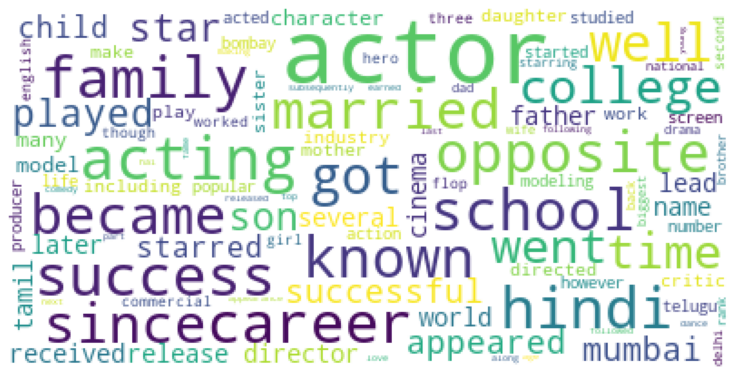

MemoryError: In RendererAgg: Out of memory

In [132]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [133]:
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

c:\users\amanj\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_extraction\text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['atul', 'ehsaan', 'loy', 'shekhar', 'souza', 'vishal'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [134]:
list(cv.vocabulary_.keys())[:10]

['doubt',
 'dedicated',
 'actor',
 'world',
 'recent',
 'success',
 'china',
 'market',
 'got',
 'title']

In [135]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [136]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

[Text(0, 0, 'actor'),
 Text(0, 0, 'film'),
 Text(0, 0, 'movie'),
 Text(0, 0, 'known'),
 Text(0, 0, 'career'),
 Text(0, 0, 'star'),
 Text(0, 0, 'school'),
 Text(0, 0, 'success'),
 Text(0, 0, 'acting'),
 Text(0, 0, 'family'),
 Text(0, 0, 'went'),
 Text(0, 0, 'opposite'),
 Text(0, 0, 'got'),
 Text(0, 0, 'well'),
 Text(0, 0, 'hindi'),
 Text(0, 0, 'celebrity'),
 Text(0, 0, 'child'),
 Text(0, 0, 'married'),
 Text(0, 0, 'tamil'),
 Text(0, 0, 'became')]

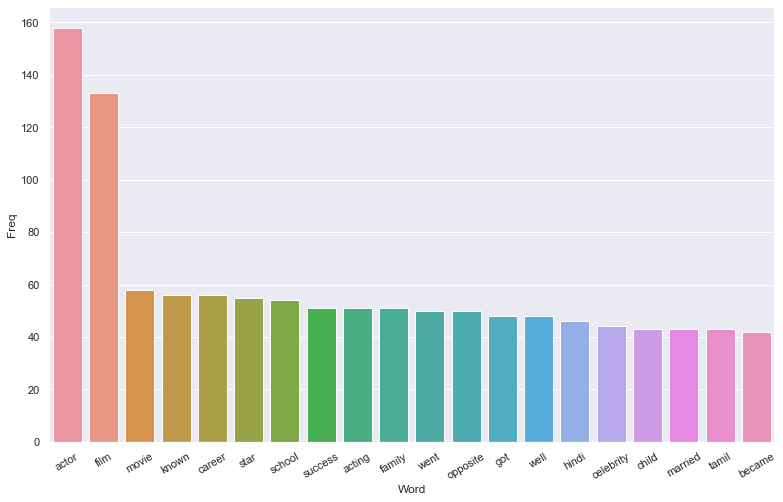

In [137]:
#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                    Bi-gram  Freq
0          forbes celebrity    26
1          critical acclaim    12
2      critically acclaimed    10
3             miss universe    10
4          highest grossing     9
5           successful film     9
6                well known     9
7            started career     9
8               action hero     9
9             social medium     9
10            uttar pradesh     8
11              music video     8
12             crowned miss     8
13          younger brother     8
14             highest paid     8
15                  co star     8
16              went become     7
17             next release     7
18         brand ambassador     7
19  commercially successful     7


[Text(0, 0, 'forbes celebrity'),
 Text(0, 0, 'critical acclaim'),
 Text(0, 0, 'critically acclaimed'),
 Text(0, 0, 'miss universe'),
 Text(0, 0, 'highest grossing'),
 Text(0, 0, 'successful film'),
 Text(0, 0, 'well known'),
 Text(0, 0, 'started career'),
 Text(0, 0, 'action hero'),
 Text(0, 0, 'social medium'),
 Text(0, 0, 'uttar pradesh'),
 Text(0, 0, 'music video'),
 Text(0, 0, 'crowned miss'),
 Text(0, 0, 'younger brother'),
 Text(0, 0, 'highest paid'),
 Text(0, 0, 'co star'),
 Text(0, 0, 'went become'),
 Text(0, 0, 'next release'),
 Text(0, 0, 'brand ambassador'),
 Text(0, 0, 'commercially successful')]

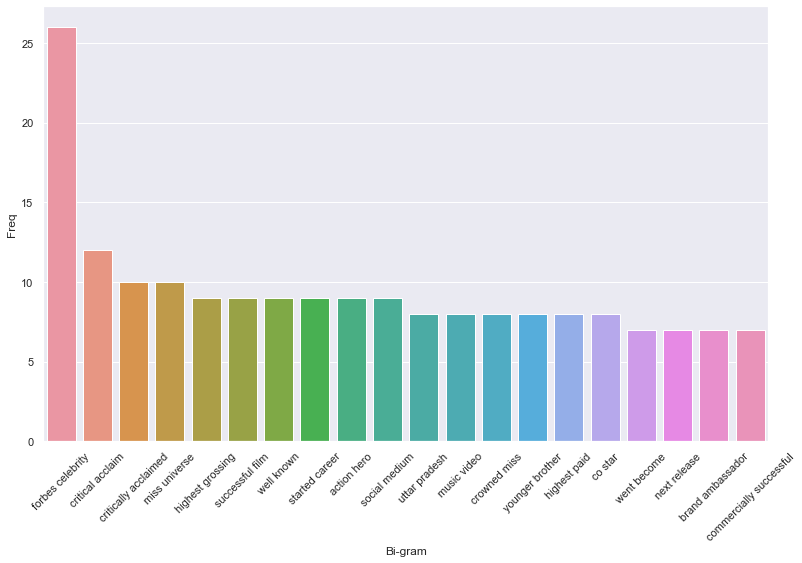

In [138]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                            Tri-gram  Freq
0                     dil chahta hai     5
1                    ram gopal varma     5
2              rank forbes celebrity     5
3       commercially successful film     4
4              forbes celebrity rank     4
5                       om shanti om     4
6           bombay maharashtra actor     4
7              dharm adhikari kanoon     4
8               adhikari kanoon apna     4
9                   kanoon apna apna     4
10                social medium fame     4
11            highest civilian honor     3
12                     gadar ek prem     3
13                     ek prem katha     3
14  critically acclaimed performance     3
15                     back back hit     3
16            bombay scottish school     3
17               continues act movie     3
18               yamla pagla deewana     3
19           return forbes celebrity     3


[Text(0, 0, 'dil chahta hai'),
 Text(0, 0, 'ram gopal varma'),
 Text(0, 0, 'rank forbes celebrity'),
 Text(0, 0, 'commercially successful film'),
 Text(0, 0, 'forbes celebrity rank'),
 Text(0, 0, 'om shanti om'),
 Text(0, 0, 'bombay maharashtra actor'),
 Text(0, 0, 'dharm adhikari kanoon'),
 Text(0, 0, 'adhikari kanoon apna'),
 Text(0, 0, 'kanoon apna apna'),
 Text(0, 0, 'social medium fame'),
 Text(0, 0, 'highest civilian honor'),
 Text(0, 0, 'gadar ek prem'),
 Text(0, 0, 'ek prem katha'),
 Text(0, 0, 'critically acclaimed performance'),
 Text(0, 0, 'back back hit'),
 Text(0, 0, 'bombay scottish school'),
 Text(0, 0, 'continues act movie'),
 Text(0, 0, 'yamla pagla deewana'),
 Text(0, 0, 'return forbes celebrity')]

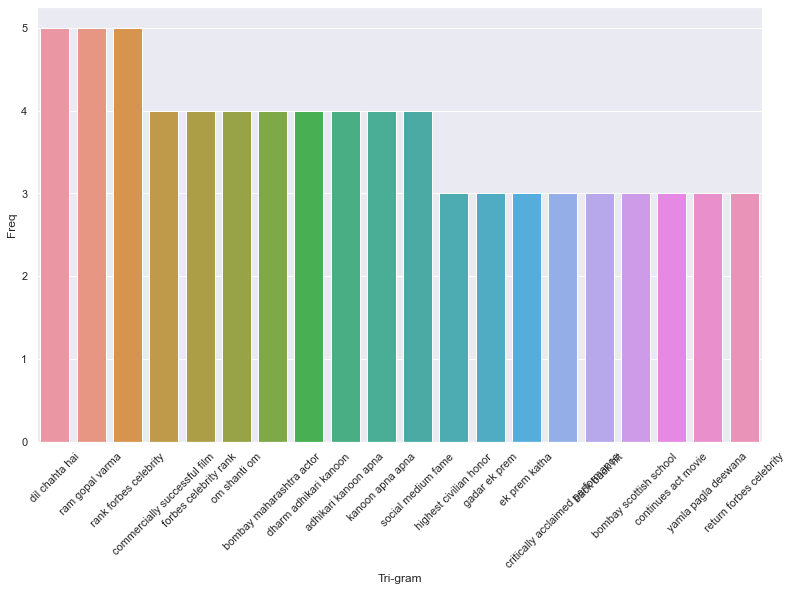

In [139]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [140]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [141]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

In [142]:
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [161]:
attributes = []
for i in range(0,174):
    # get feature names
    feature_names=cv.get_feature_names()
 
    # fetch document for which keywords needs to be extracted
    doc=corpus[i]
 
    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    #extract only the top n; n here is 10
    keywords=extract_topn_from_vector(feature_names,sorted_items,14)
    
    attributes.append(df["name"][i])
    attributes[i] = []
    for k in keywords:
        attributes[i].append(k)

In [122]:
df.head()

,Unnamed: 0,Unnamed: 0.1,name,born,nickname,height,img_x,birth name,img_y,rank,bio,word_count,attributes
0,0,0,Aamir Khan,"March 14, \n \n1965 \n \nin Bombay, Ma...",Mr. Perfectionist\nTom Hanks of India\nAce of ...,"5' 4"" (1.62 m)",https://m.media-amazon.com/images/M/MV5BMjAwMj...,NaN,https://www.forbesindia.com/media/celeblist201...,15.0,Aamir is no doubt one of the most dedicated ac...,751,"[aamir, movie like, film, like, ghajini, china..."
1,1,1,Madhuri Dixit,"May 15, \n \n1967 \n \nin Bombay, Maha...",Bubbly\nDhak Dhak Girl\nMohini,"5' 2½"" (1.58 m)",https://m.media-amazon.com/images/M/MV5BNTk0OT...,Madhuri Shankar Dixit,NaN,-1.0,Madhuri Dixit is one of the most acclaimed act...,1253,"[dixit, filmfare best actress, actress award, ..."
2,2,2,Manisha Koirala,"August 16, \n \n1970 \n \nin Kathmandu...",NaN,"5' 2"" (1.58 m)",https://m.media-amazon.com/images/M/MV5BMjMwMD...,Manisha P. Koirala,NaN,-1.0,Manisha Koirala (born 16 August 1970) is a Nep...,522,"[woman, manisha, koirala, several, actress, be..."
3,3,3,Shriya Saran,"September 11, \n \n1982 \n \nin Dehra ...",NaN,"5' 4½"" (1.64 m)",https://m.media-amazon.com/images/M/MV5BMTk4MD...,Shriya Saran Bhatnagar,NaN,-1.0,"Shriya Saran also known by the mononym Shriya,...",207,"[saran, film, tamil film, tamil, shriya, indus..."
4,4,4,Abhay Deol,"March 15, \n \n1976 \n \nin Chandigarh...",NaN,"5' 10¾"" (1.8 m)",https://m.media-amazon.com/images/M/MV5BMTU2Nz...,NaN,NaN,-1.0,"Abhay Deol (born in 1976, India) is an Indian ...",87,"[deol, abhay, actor, film, opposite ayesha tak..."


In [163]:
df.drop(['Unnamed: 0' , 'Unnamed: 0.1'] , axis =1)

,Unnamed: 0.1.1,name,born,nickname,height,img_x,birth name,img_y,rank,bio,word_count,attributes
0,0,Aamir Khan,"March 14, \n \n1965 \n \nin Bombay, Ma...",Mr. Perfectionist\nTom Hanks of India\nAce of ...,"5' 4"" (1.62 m)",https://m.media-amazon.com/images/M/MV5BMjAwMj...,NaN,https://www.forbesindia.com/media/celeblist201...,15.0,Aamir is no doubt one of the most dedicated ac...,751,"['aamir', 'movie like', 'film', 'like', 'ghaji..."
1,1,Madhuri Dixit,"May 15, \n \n1967 \n \nin Bombay, Maha...",Bubbly\nDhak Dhak Girl\nMohini,"5' 2½"" (1.58 m)",https://m.media-amazon.com/images/M/MV5BNTk0OT...,Madhuri Shankar Dixit,NaN,-1.0,Madhuri Dixit is one of the most acclaimed act...,1253,"['dixit', 'filmfare best actress', 'actress aw..."
2,2,Manisha Koirala,"August 16, \n \n1970 \n \nin Kathmandu...",NaN,"5' 2"" (1.58 m)",https://m.media-amazon.com/images/M/MV5BMjMwMD...,Manisha P. Koirala,NaN,-1.0,Manisha Koirala (born 16 August 1970) is a Nep...,522,"['woman', 'manisha', 'koirala', 'several', 'ac..."
3,3,Shriya Saran,"September 11, \n \n1982 \n \nin Dehra ...",NaN,"5' 4½"" (1.64 m)",https://m.media-amazon.com/images/M/MV5BMTk4MD...,Shriya Saran Bhatnagar,NaN,-1.0,"Shriya Saran also known by the mononym Shriya,...",207,"['saran', 'film', 'tamil film', 'tamil', 'shri..."
4,4,Abhay Deol,"March 15, \n \n1976 \n \nin Chandigarh...",NaN,"5' 10¾"" (1.8 m)",https://m.media-amazon.com/images/M/MV5BMTU2Nz...,NaN,NaN,-1.0,"Abhay Deol (born in 1976, India) is an Indian ...",87,"['deol', 'abhay', 'actor', 'film', 'opposite a..."
...,...,...,...,...,...,...,...,...,...,...,...,...
169,169,Ranveer Brar,NaN,NaN,NaN,NaN,NaN,https://www.forbesindia.com/media/celeblist201...,96.0,Ranveer Brar is the second-highest earning ce...,19,"['popular travel led', 'popular travel', 'list..."
170,170,Vikas Khanna,NaN,NaN,NaN,NaN,NaN,https://www.forbesindia.com/media/celeblist201...,97.0,Best known for his Michelin-starred Manhattan...,20,"['michelin starred manhattan', 'michelin starr..."
171,171,Rohan Bopanna,NaN,NaN,NaN,NaN,NaN,https://www.forbesindia.com/media/celeblist201...,98.0,Bopanna has had an active 2018-19 playing sev...,17,"['playing several grand', 'playing several', '..."
172,172,Vicky Ratnani,NaN,NaN,NaN,NaN,NaN,https://www.forbesindia.com/media/celeblist201...,99.0,"With web series Vicky the Gastronaut, Chef Vi...",20,"['vicky', 'web series', 'web', 'list year', 'c..."


In [165]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1' , 'Unnamed: 0.1.1'] , axis =1)

In [166]:
df.to_csv('final2_full.csv') 

In [2]:
df = pd.read_csv("final2_full.csv")

In [ ]:
for i in range (0,174):
    print("Name: " + df["name"][i])
    try:
        response = requests.get(df["img_x"][i])
        img = Image.open(BytesIO(response.content))
        imgplot = plt.imshow(img)
        plt.show()
    except:
        try:
            response = requests.get(df["img_y"][i])
            img = Image.open(BytesIO(response.content))
            imgplot = plt.imshow(img)
            plt.show()
        except:
            print("No image")
    print("Attributes: " , end ="")
    for attribute in df["attributes"][i].split():
        print(attribute , end =" ")
    print()
    print('Born: '+ str(df["born"][i]))
    print()
    print('Nickname: '+ str(df["nickname"][i]))
    print()
    print('Height:  '+ str(df["height"][i]))
    print()
    print('Birth Name: '+ str(df["birth name"][i]))
    print()
    print('Rank: '+ str(df["rank"][i]))
    print()
    print("-----------------------------------------------")
    print()